In [85]:
from collections import Counter, defaultdict
from copy import deepcopy

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, spearmanr
from scipy.spatial.distance import correlation

from graph_builders.basic_graph import create_full_graph

In [3]:
G: nx.Graph = create_full_graph()

missing Joseph Vella (Cabinet member)
missing Joseph Vella (Cabinet member)
missing Joseph Vella (Cabinet member)
missing Joseph Vella (Cabinet member)
missing Joseph Vella (Cabinet member)
missing Fiona Knab-Lunny (Cabinet member)
missing Fiona Knab-Lunny (Cabinet member)
missing Joseph Vella (Cabinet member)
missing Joseph Vella (Cabinet member)
missing Joseph Vella (Cabinet member)
missing Joseph Vella (Cabinet member)
missing Joseph Vella (Cabinet member)
missing Joseph Vella (Cabinet member)
missing Joseph Vella (Cabinet member)
missing Joseph Vella (Cabinet member)
missing Fiona Knab-Lunny (Cabinet member)
missing Joseph Vella (Cabinet member)
missing Joseph Vella (Cabinet member)
missing Fiona Knab-Lunny (Cabinet member)


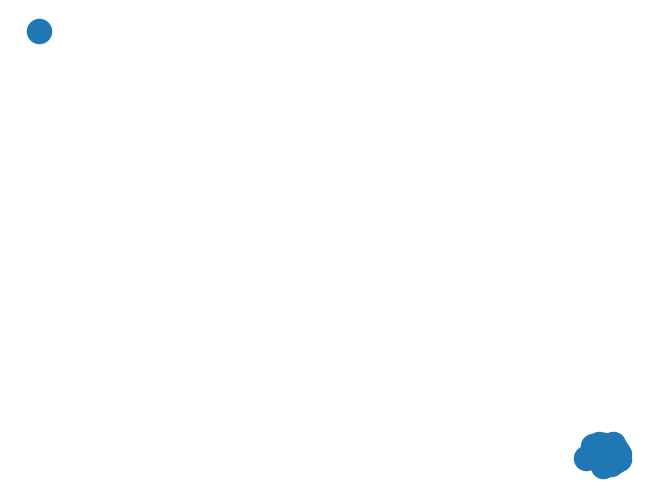

In [4]:
nx.draw(G)

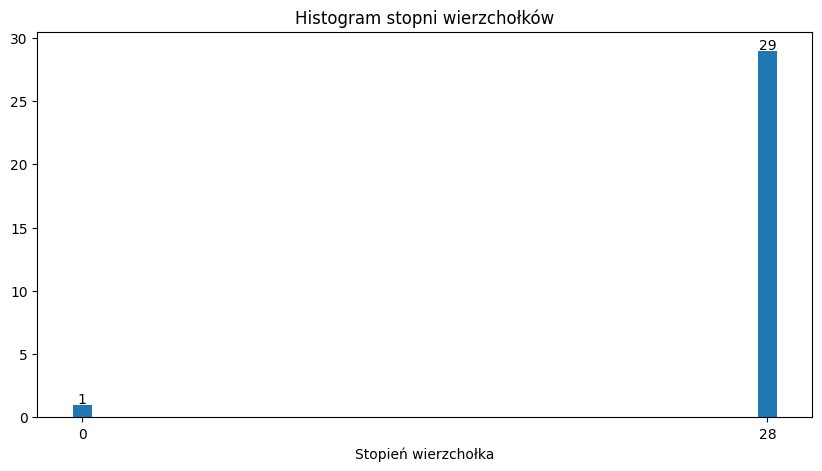

In [11]:
degrees = [x[1] for x in sorted(G.degree(), key=lambda x: x[1])]

degrees_hist = Counter(degrees)

x, y = list(degrees_hist.keys()), list(degrees_hist.values())

plt.figure(figsize=(10, 5))
plt.bar(x, y)
plt.xticks(x)
plt.title('Histogram stopni wierzchołków')
plt.xlabel('Stopień wierzchołka')
for i in range(len(x)):
    plt.text(x[i], y[i] + 0.1, y[i], ha='center')
plt.draw()

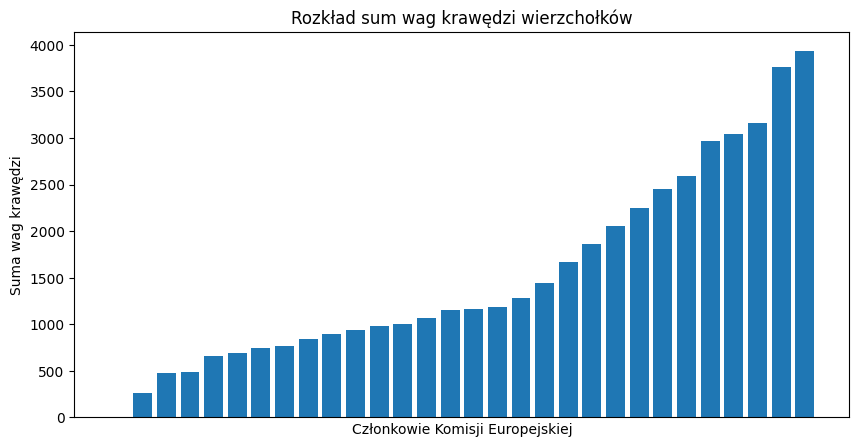

In [8]:
degrees_weights = [x[1] for x in sorted(G.degree(weight='weight'), key=lambda x: x[1])]

plt.figure(figsize=(10, 5))
plt.bar(range(len(degrees_weights)), degrees_weights)
plt.xticks([])
plt.title('Rozkład sum wag krawędzi wierzchołków')
plt.xlabel('Członkowie Komisji Europejskiej')
plt.ylabel('Suma wag krawędzi')
plt.show()

In [300]:
G.edges.data()

EdgeDataView([('Adina-Ioana Vălean (Commissioner)', 'Dubravka Šuica (Vice-President)', {'weight': 10}), ('Adina-Ioana Vălean (Commissioner)', 'Margaritis Schinas (Vice-President)', {'weight': 30}), ('Adina-Ioana Vălean (Commissioner)', 'Paolo Gentiloni (Commissioner)', {'weight': 26}), ('Adina-Ioana Vălean (Commissioner)', 'Věra Jourová (Vice-President)', {'weight': 29}), ('Adina-Ioana Vălean (Commissioner)', 'Janusz Wojciechowski (Commissioner)', {'weight': 24}), ('Adina-Ioana Vălean (Commissioner)', 'Jutta Urpilainen (Commissioner)', {'weight': 12}), ('Adina-Ioana Vălean (Commissioner)', 'Frans Timmermans (Executive Vice-President)', {'weight': 128}), ('Adina-Ioana Vălean (Commissioner)', 'Johannes Hahn (Commissioner)', {'weight': 118}), ('Adina-Ioana Vălean (Commissioner)', 'Didier Reynders (Commissioner)', {'weight': 57}), ('Adina-Ioana Vălean (Commissioner)', 'Ursula von der Leyen (President)', {'weight': 60}), ('Adina-Ioana Vălean (Commissioner)', 'Margrethe Vestager (Executive V

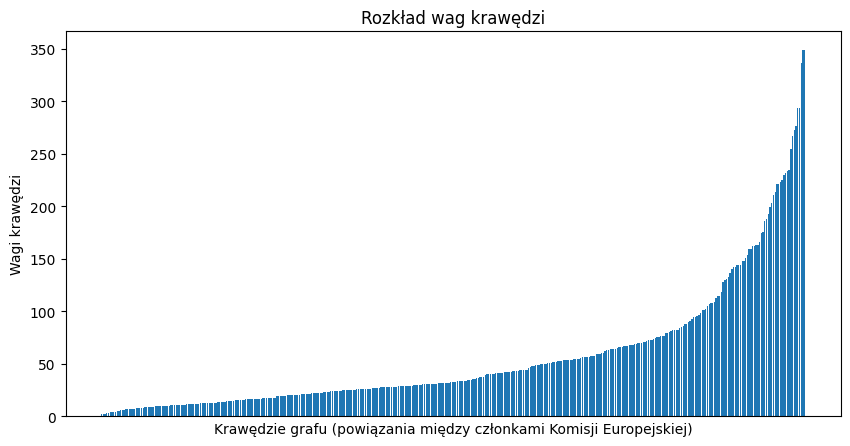

In [9]:
weights = [x[2]['weight'] for x in sorted(G.edges.data(), key=lambda x: x[2]['weight'])]

plt.figure(figsize=(10, 5))
plt.bar(range(len(weights)), weights)
plt.xticks([])
plt.title('Rozkład wag krawędzi')
plt.xlabel('Krawędzie grafu (powiązania między członkami Komisji Europejskiej)')
plt.ylabel('Wagi krawędzi')
plt.show()

In [298]:
G.edges.data()

EdgeDataView([('Adina-Ioana Vălean (Commissioner)', 'Dubravka Šuica (Vice-President)', {'weight': 10}), ('Adina-Ioana Vălean (Commissioner)', 'Margaritis Schinas (Vice-President)', {'weight': 30}), ('Adina-Ioana Vălean (Commissioner)', 'Paolo Gentiloni (Commissioner)', {'weight': 26}), ('Adina-Ioana Vălean (Commissioner)', 'Věra Jourová (Vice-President)', {'weight': 29}), ('Adina-Ioana Vălean (Commissioner)', 'Janusz Wojciechowski (Commissioner)', {'weight': 24}), ('Adina-Ioana Vălean (Commissioner)', 'Jutta Urpilainen (Commissioner)', {'weight': 12}), ('Adina-Ioana Vălean (Commissioner)', 'Frans Timmermans (Executive Vice-President)', {'weight': 128}), ('Adina-Ioana Vălean (Commissioner)', 'Johannes Hahn (Commissioner)', {'weight': 118}), ('Adina-Ioana Vălean (Commissioner)', 'Didier Reynders (Commissioner)', {'weight': 57}), ('Adina-Ioana Vălean (Commissioner)', 'Ursula von der Leyen (President)', {'weight': 60}), ('Adina-Ioana Vălean (Commissioner)', 'Margrethe Vestager (Executive V

In [10]:
for x in (
    np.mean(degrees_weights),
    np.median(degrees_weights),
    np.std(degrees_weights),
    np.min(degrees_weights),
    np.max(degrees_weights),
    np.mean(weights),
    np.median(weights),
    np.std(weights),
    np.min(weights),
    np.max(weights),
):
    print(x)

1527.6666666666667
1157.0
1031.8095539175606
0
3937
56.44088669950739
33.0
61.00391817507545
2
349


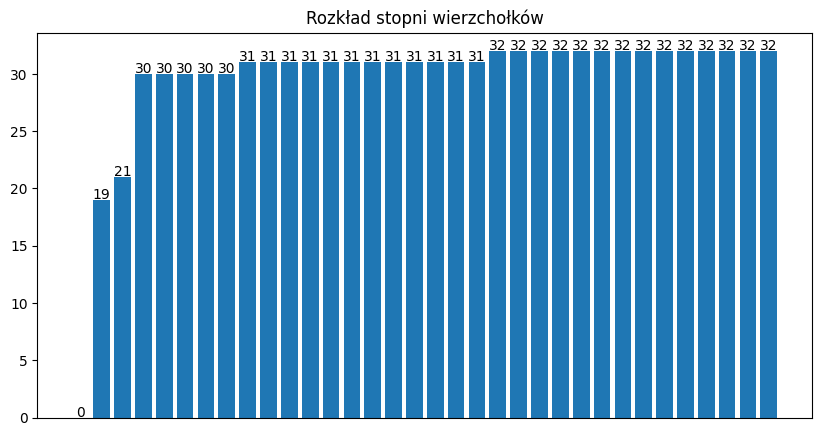

In [206]:
x, y = range(len(degrees)), degrees

plt.figure(figsize=(10, 5))
plt.bar(x, y)
plt.xticks([])
plt.title('Rozkład stopni wierzchołków')
for i in range(len(x)):
    plt.text(x[i], y[i] + 0.1, y[i], ha='center')
plt.draw()

In [288]:
len(G.nodes)

31

In [214]:
G.nodes['Adina-Ioana Vălean (Commissioner)']
G.degree

DegreeView({'Adina-Ioana Vălean (Commissioner)': 31, 'Didier Reynders (Commissioner)': 32, 'Dubravka Šuica (Vice-President)': 31, 'Elisa Ferreira (Commissioner)': 30, 'Frans Timmermans (Executive Vice-President)': 32, 'Helena Dalli (Commissioner)': 32, 'Iliana Ivanova (Commissioner)': 30, 'Janez Lenarčič (Commissioner)': 32, 'Janusz Wojciechowski (Commissioner)': 31, 'Johannes Hahn (Commissioner)': 32, 'Josep Borrell (Vice-President)': 0, 'Jutta Urpilainen (Commissioner)': 32, 'Kadri Simson (Commissioner)': 30, 'Mairead McGuinness (Commissioner)': 32, 'Margaritis Schinas (Vice-President)': 30, 'Margrethe Vestager (Executive Vice-President)': 32, 'Mariya Gabriel (Commissioner)': 32, 'Maroš Šefčovič (Vice-President)': 30, 'Nicolas Schmit (Commissioner)': 31, 'Olivér Várhelyi (Commissioner)': 31, 'Paolo Gentiloni (Commissioner)': 32, 'Phil Hogan (Commissioner)': 31, 'Stella Kyriakides (Commissioner)': 31, 'Thierry Breton (Commissioner)': 32, 'Ursula von der Leyen (President)': 32, 'Valdis

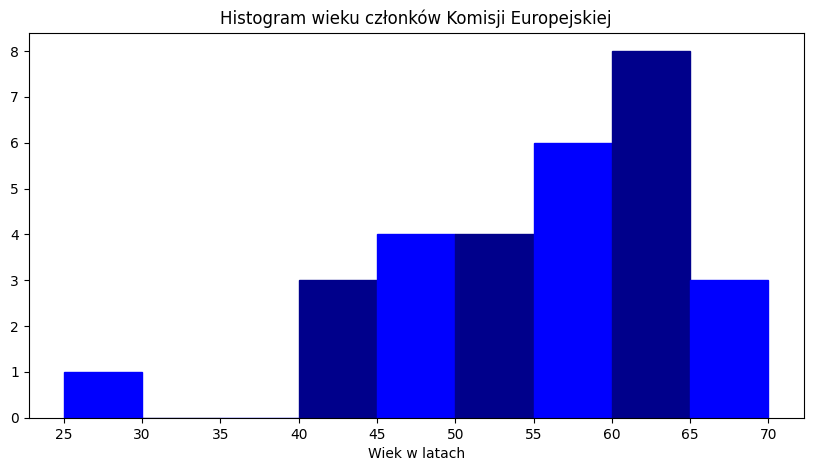

In [94]:
age_data = [x.get('age') for x in dict(G.nodes.data()).values()]
age_data
fig, ax = plt.subplots()
n, bins, patches = ax.hist([x for x in age_data if x], bins=range(25, 75, 5))

fig.set_figheight(5)
fig.set_figwidth(10)
ax.xaxis.set_label_text('Wiek w latach')

plt.title('Histogram wieku członków Komisji Europejskiej')


for i in range(len(n)):
    patches[i].set_color('darkblue' if i % 2 else 'blue')

plt.xticks(range(25, 75, 5))
plt.show()

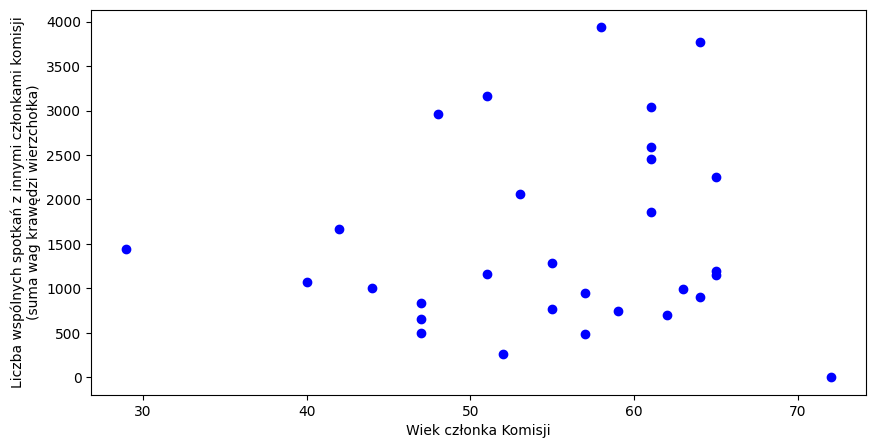

In [78]:
X = list()
Y = list()
for name, attrs in G.nodes.data():
    try:
        X.append(attrs['age'])
    except KeyError:
        continue
    Y.append(G.degree(weight='weight')[name])

corr, _ = pearsonr(X, Y)

plt.figure(figsize=(10,5))
plt.ylabel('Liczba wspólnych spotkań z innymi członkami komisji\n(suma wag krawędzi wierzchołka)')
plt.xlabel('Wiek członka Komisji')
plt.plot(X, Y, 'bo')
plt.show()


In [80]:
Y

[1163,
 2450,
 696,
 901,
 3937,
 481,
 840,
 260,
 1191,
 3045,
 0,
 1002,
 1667,
 1858,
 943,
 3160,
 1067,
 2058,
 2248,
 493,
 1151,
 749,
 987,
 3767,
 2592,
 2965,
 1444,
 1285,
 658,
 772]

In [97]:
weights_age_bins = {x: [] for x in range(25, 70, 5)}
for name, attrs in G.nodes.data():
    for x in weights_age_bins.keys():
        try:
            if x <= attrs['age'] < x + 5:
                weights_age_bins[x].append(G.degree(weight='weight')[name])
                break
        except KeyError:
            continue

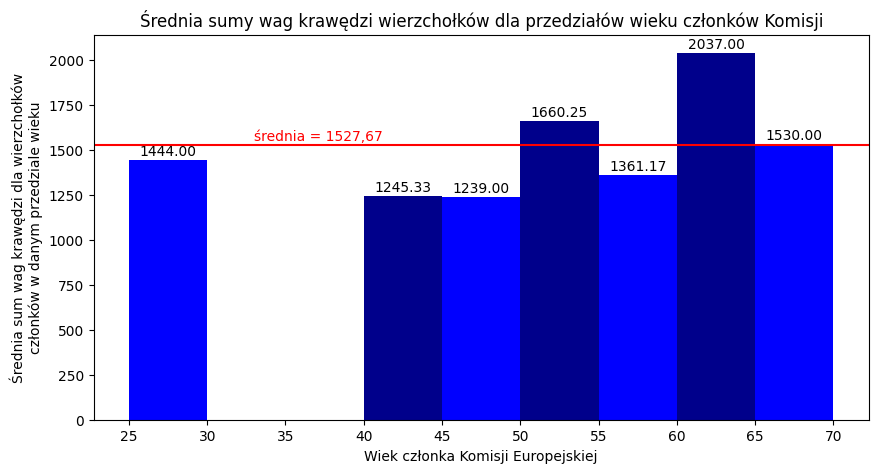

In [98]:
def plot_weights_age(bins=weights_age_bins, mean_=True):

    fig, ax = plt.subplots()
    fig.set_figheight(5)
    fig.set_figwidth(10)

    for k, v in bins.items():
        if mean_:
            x = [np.mean(v) if v else 0.0]
        else:
            x = [np.sum(v)]
        y = [k, k + 5]
        ax.stairs(x, y, fill=True, color='blue' if k % 10 else 'darkblue')
        if x[0]:
            if mean_:
                plt.text(np.mean(y), x[0] + 25, f'{x[0]:.2f}', ha='center')
            else:
                plt.text(np.mean(y), x[0] + 100, f'{x[0]:.2f}', ha='center')



    plt.xticks(range(25, 75, 5))
    if mean_:
        plt.title('Średnia sumy wag krawędzi wierzchołków dla przedziałów wieku członków Komisji')
    else:
        plt.title('Suma wag krawędzi wierzchołków dla przedziałów wieku członków Komisji')
    plt.xlabel('Wiek członka Komisji Europejskiej')
    if mean_:
        plt.ylabel('Średnia sum wag krawędzi dla wierzchołków\nczłonków w danym przedziale wieku')
        plt.axline((25, 1527.67), (70, 1527.67), color='red')
        plt.text(33, 1550, 'średnia = 1527,67', color='red')
    else:
        plt.ylabel('Suma wag krawędzi dla wierzchołków\nczłonków w danym przedziale wieku')
    plt.show()

plot_weights_age()

In [99]:
pearsonr([sum(v) for v in weights_age_bins.values()], n)

PearsonRResult(statistic=np.float64(0.9628987822326742), pvalue=np.float64(3.123383471770212e-05))

In [87]:
names_age = defaultdict(list)
for name, attrs in G.nodes.data():
    names_age[name.split('(')[1]].append((name, attrs['age']))

dict(names_age)

{'Commissioner)': [('Adina-Ioana Vălean (Commissioner)', 51),
  ('Didier Reynders (Commissioner)', 61),
  ('Elisa Ferreira (Commissioner)', 64),
  ('Helena Dalli (Commissioner)', 57),
  ('Iliana Ivanova (Commissioner)', 47),
  ('Janez Lenarčič (Commissioner)', 52),
  ('Janusz Wojciechowski (Commissioner)', 65),
  ('Johannes Hahn (Commissioner)', 61),
  ('Jutta Urpilainen (Commissioner)', 44),
  ('Kadri Simson (Commissioner)', 42),
  ('Mairead McGuinness (Commissioner)', 61),
  ('Mariya Gabriel (Commissioner)', 40),
  ('Nicolas Schmit (Commissioner)', 65),
  ('Olivér Várhelyi (Commissioner)', 47),
  ('Paolo Gentiloni (Commissioner)', 65),
  ('Phil Hogan (Commissioner)', 59),
  ('Stella Kyriakides (Commissioner)', 63),
  ('Thierry Breton (Commissioner)', 64),
  ('Virginijus Sinkevičius (Commissioner)', 29),
  ('Wopke Hoekstra (Commissioner)', 47),
  ('Ylva Johansson (Commissioner)', 55)],
 'Vice-President)': [('Dubravka Šuica (Vice-President)', 62),
  ('Josep Borrell (Vice-President)', 7

In [332]:
correlation(X, Y)

np.float64(0.9157519784819699)

In [278]:
len(G.nodes.data())
for name, attr in G.nodes.data():
    print(name, attr)

Adina-Ioana Vălean (Commissioner) {'age': 51, 'education': ['Mathematics', 'Security and Defence Studies', 'International Relations'], 'political_group': 'EPP'}
Didier Reynders (Commissioner) {'age': 61, 'education': ['Law'], 'political_group': 'Renew'}
Dubravka Šuica (Vice-President) {'age': 62, 'education': ['Humanities and Languages', 'Social Sciences'], 'political_group': 'EPP'}
Elisa Ferreira (Commissioner) {'age': 64, 'education': ['Economics'], 'political_group': 'S&D'}
Frans Timmermans (Executive Vice-President) {'age': 58, 'education': ['Law', 'Humanities and Languages'], 'political_group': 'S&D'}
Helena Dalli (Commissioner) {'age': 57, 'education': ['Political Science', 'Social Sciences'], 'political_group': 'S&D'}
Iliana Ivanova (Commissioner) {'age': 47, 'education': ['Economics'], 'political_group': 'EPP'}
Janez Lenarčič (Commissioner) {'age': 52, 'education': ['Law'], 'political_group': 'Renew'}
Janusz Wojciechowski (Commissioner) {'age': 65, 'education': ['Law'], 'politi

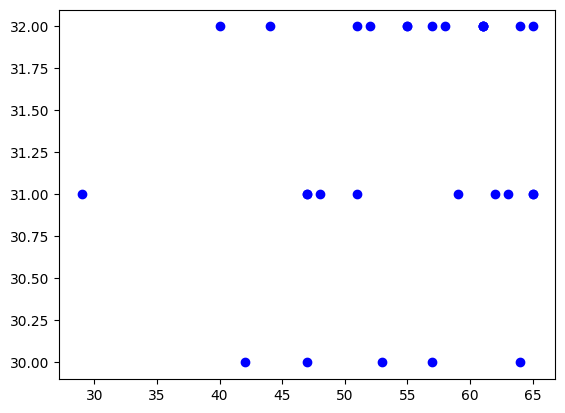

In [265]:
plt.plot(correlation_X, correlation_Y, 'bo')

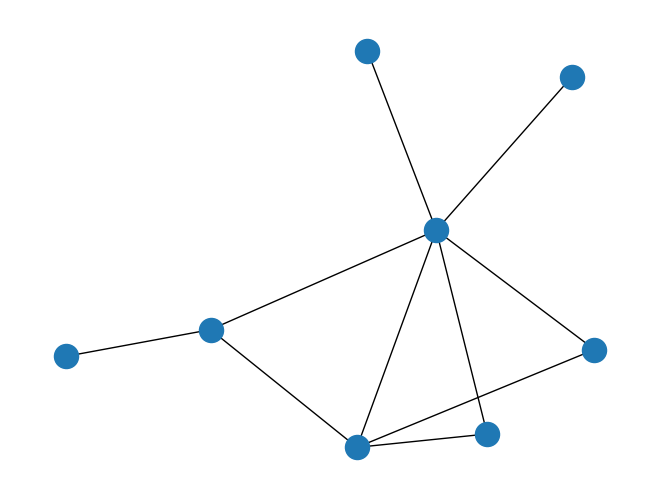

In [129]:
most_popular_pairs = sorted(G.edges.data(), key=lambda x: x[2]['weight'], reverse=True)

sub_G = G.edge_subgraph([(x[0], x[1]) for x in most_popular_pairs[:10]])
nx.draw_kamada_kawai(sub_G)

In [103]:
G.nodes['Frans Timmermans (Executive Vice-President)']

{'age': 58,
 'education': ['Law', 'Humanities and Languages'],
 'political_group': 'S&D'}

29


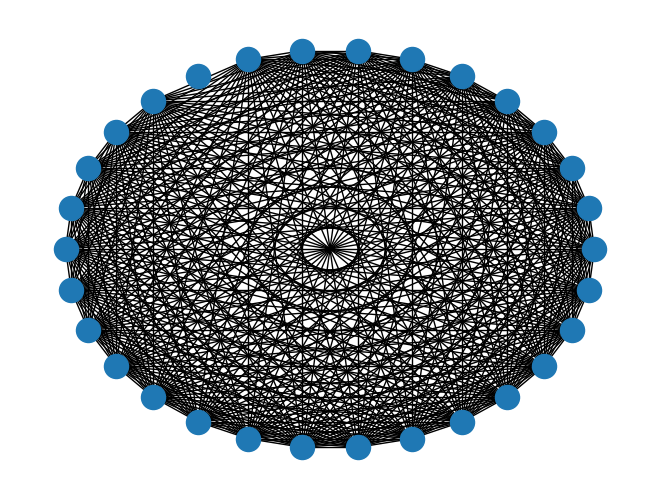

In [115]:
G1 = deepcopy(G)
G1.remove_node('Josep Borrell (Vice-President)')
print(len(G1.nodes))


nx.draw_circular(G)
# nx.draw_networkx_edge_labels(G1, pos, )
# nx.draw(G1)

In [352]:
len(G.nodes)

31

In [123]:
list(G.edges)[0]

('Adina-Ioana Vălean (Commissioner)', 'Dubravka Šuica (Vice-President)')

In [130]:
G.edges[list(G.edges)[6]]

{'weight': 128}